In [6]:
from matplotlib import pyplot as plt
import numpy as np

from data.MNIST.mnist_csv_loader import load_data

batch_size = 64

In [2]:
train_x_raw, train_y_raw = load_data('../data/MNIST/csv/mnist_train.csv')
test_x_raw, test_y_raw = load_data('../data/MNIST/csv/mnist_test.csv')

In [48]:
def normalize(x: np.ndarray) -> np.ndarray:
    min_v, max_v = np.min(x), np.max(x)
    return ((x + min_v) / (max_v - min_v)) * 2. - 1.

In [49]:
# prepare training data
n = train_x_raw.shape[0]
train_x = [
    normalize(train_x_raw[i:i+batch_size])
    for i in range(0, n, batch_size)
][:-1]
train_y = [
    train_y_raw[i:i+batch_size]
    for i in range(0, n, batch_size)
][:-1]
train_y_1hot = []
for y in train_y:
    y1 = np.zeros((batch_size, 10))
    y1[range(batch_size), y.astype(int).reshape((batch_size))] = 1.
    train_y_1hot.append(y1)

In [50]:
# preprocess test set to get accuracy
test_x = normalize(test_x_raw)
test_y = test_y_raw
n = len(test_y)
test_y_1hot = np.zeros((n, 10))
test_y_1hot[range(n), test_y.astype('int').reshape((n))] = 1

def get_accuracy(model):
    result = model.inference(test_x)
    return (np.argmax(result, axis=1) == test_y[:,0]).astype('float').sum() / float(len(test_y))

In [51]:
from src.model import Model
from src.cost import LogSoftmax, CrossEntropyWithSoftmax
from src.activation import Identity, ReLU

In [52]:
# build model
m = Model(learning_rate=.01, cost=CrossEntropyWithSoftmax).layer(28*28).layer(300, ReLU).layer(100, ReLU).layer(10, Identity)

In [53]:
# repeating data set (because I don't have enough)
xx = train_x *2
yy = train_y_1hot *2

# collect cost and accuracy for plotting
cost, accuracy = [], []

In [54]:
%%time
# train
for i in range(len(xx)):
    x, y = xx[i], yy[i]
    m.inference(x)
    cost.append(m.get_cost(y))
    m.back_prop(y)
    accuracy.append(get_accuracy(m))

CPU times: user 9min 19s, sys: 1min 35s, total: 10min 55s
Wall time: 5min 33s


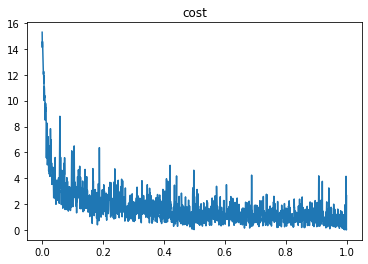

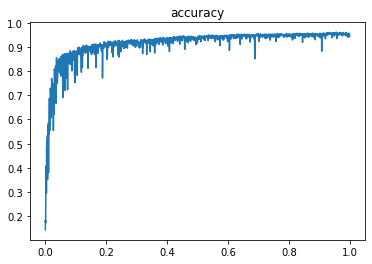

0.9423


In [55]:
# plot cost and accuracy
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(cost)), np.array(cost))
ax.set_title('cost')
plt.show()
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(accuracy)), np.array(accuracy))
ax.set_title('accuracy')
plt.show()
print(accuracy[-1])

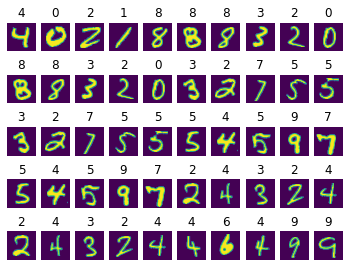

In [56]:
# randomly pick some test data points to give some intuitive proof
n, p = 10, 5
random_pick = test_x[np.random.choice(np.arange(test_x.shape[0]), n*p)]
result = m.inference(random_pick)
result_literal = np.argmax(result, axis=1)
fig, axs = plt.subplots(p, n)
for i in range(p):
    for j in range(n):
        # use prediction as title
        axs[i, j].set_title('{}'.format(result_literal[i*p+j]))
        axs[i, j].imshow(random_pick[i*p+j].reshape((28, 28)))
        axs[i, j].axis('off')
plt.subplots_adjust(top=1)
plt.show()